In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?&units={units}&appid=7334a7fb96bac0f90b8f231ece8c08ce&q='
units = 'Metric'  
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | hampton bays
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | tayshet
Processing Record 5 of Set 1 | annau
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | emerald
Processing Record 9 of Set 1 | visakhapatnam
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | flying fish cove
Processing Record 12 of Set 1 | serowe
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | ironwood
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | san antonio de pale
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | wa

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,282.40,85,75,0.00,US,1682572326
1,hampton bays,40.8690,-72.5176,283.23,91,100,0.00,US,1682572327
2,adamstown,-25.0660,-130.1015,297.30,69,22,2.96,PN,1682572327
3,tayshet,55.9342,98.0044,277.10,48,88,6.33,RU,1682572327
4,annau,37.8876,58.5160,298.14,38,17,4.12,TM,1682572328


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(30)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,282.40,85,75,0.00,US,1682572326
1,hampton bays,40.8690,-72.5176,283.23,91,100,0.00,US,1682572327
2,adamstown,-25.0660,-130.1015,297.30,69,22,2.96,PN,1682572327
3,tayshet,55.9342,98.0044,277.10,48,88,6.33,RU,1682572327
4,annau,37.8876,58.5160,298.14,38,17,4.12,TM,1682572328
5,college,64.8569,-147.8028,276.33,55,75,2.06,US,1682572159
6,port mathurin,-19.6833,63.4167,299.25,80,17,5.46,MU,1682572328
7,emerald,-23.5333,148.1667,301.67,37,62,4.04,AU,1682572280
8,visakhapatnam,17.6900,83.2093,306.09,52,40,1.54,IN,1682572328


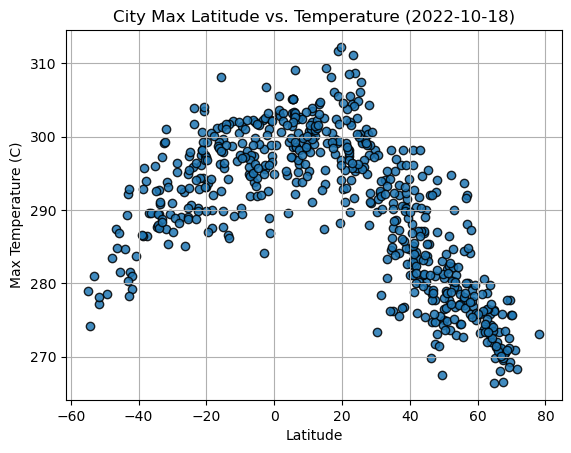

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha = 0.85)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

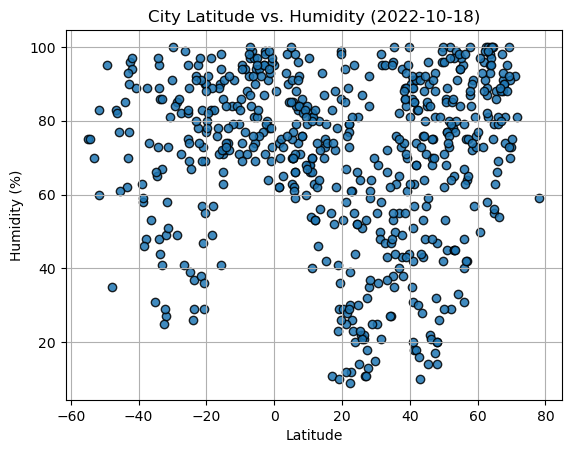

In [23]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha = 0.85)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

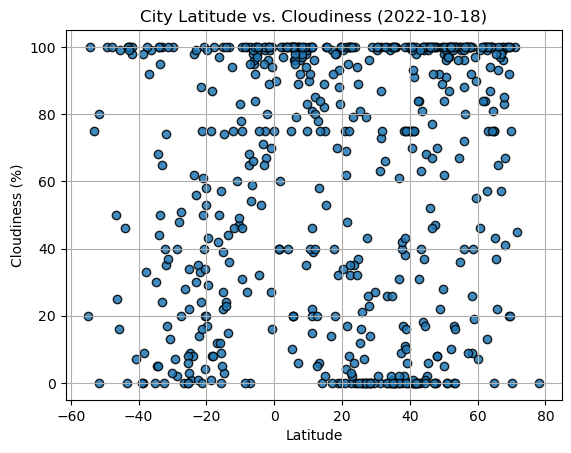

In [24]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha = 0.85)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

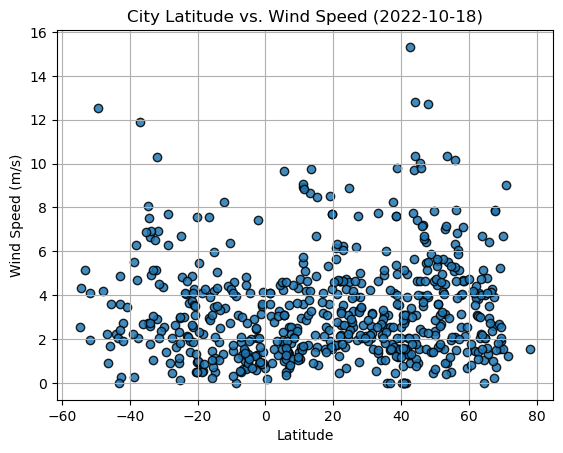

In [25]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha = 0.85)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [26]:
# Define a function to create Linear Regression plots
def lin_regress_plot(x, y, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.scatter(x, y)

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,282.40,85,75,0.00,US,1682572326
1,hampton bays,40.8690,-72.5176,283.23,91,100,0.00,US,1682572327
3,tayshet,55.9342,98.0044,277.10,48,88,6.33,RU,1682572327
4,annau,37.8876,58.5160,298.14,38,17,4.12,TM,1682572328
5,college,64.8569,-147.8028,276.33,55,75,2.06,US,1682572159
8,visakhapatnam,17.6900,83.2093,306.09,52,40,1.54,IN,1682572328
14,ironwood,46.4547,-90.1710,278.60,70,100,7.20,US,1682572330
19,utrik,11.2278,169.8474,299.95,82,22,8.93,MH,1682572331
22,trenton,40.2170,-74.7429,282.68,90,75,0.00,US,1682572129


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,297.30,69,22,2.96,PN,1682572327
6,port mathurin,-19.6833,63.4167,299.25,80,17,5.46,MU,1682572328
7,emerald,-23.5333,148.1667,301.67,37,62,4.04,AU,1682572280
9,ushuaia,-54.8000,-68.3000,278.96,75,20,2.57,AR,1682572329
10,flying fish cove,-10.4217,105.6791,300.50,79,47,6.36,CX,1682572329


The r-squared is: 0.7485680044881824


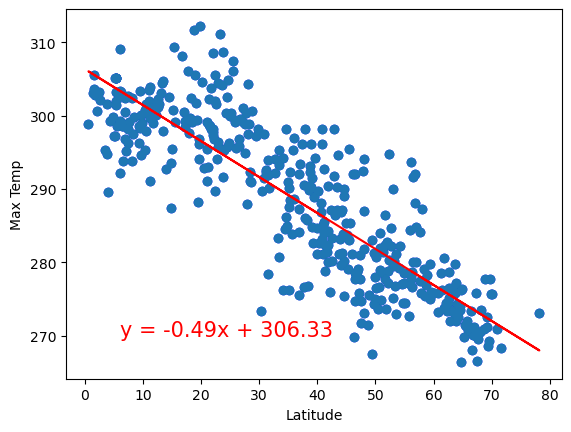

In [29]:
# Linear regression on Northern Hemisphere Temperature vs. Latitude
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (6, 270))
# plt.show()

The r-squared is: 0.42791808326749964


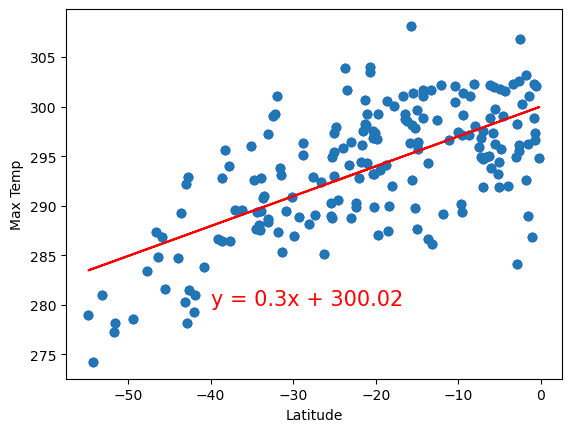

In [30]:
# Linear regression on Southern Hemisphere Temperature vs. Latitude
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-40, 280))

^ Discussion about the linear relationship above: The two linear regressions displayed above are moedeling the relationship between 'Latitude' and 'Max Temperature' in cities above and below the equator. The northern hemisphere plot displays a strong positive relationship (r value >= 0.75) between 'Latitude' and 'Max Temperature' in cities above the equator while the southern hemisphere plot displays a moderately weak positive relationship between the two variables (r value <= 0.50). These relationships indicate that we can confidently conclude as a northern city's latitudes increase (move further from the equator) the max temperature shall decrease, and a southern city's latitudes increase (approach the equator) the max temperature shall increase.

The r-squared is: 0.027165284273197254


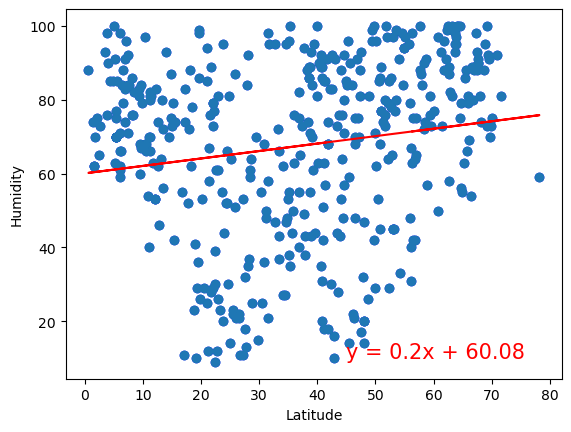

In [31]:
# Linear regression on Northern Hemisphere Temperature vs. Humidity
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='b')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (45, 10))

The r-squared is: 0.09276352050190119


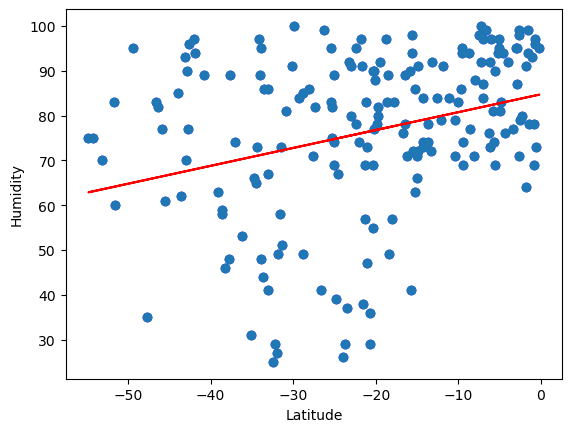

In [32]:
# Linear regression on Southern Hemisphere Temperature vs. Humidity
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='b')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-55, 20))

^ Discussion about the linear relationship above: The two linear regressions displayed above are moedeling the relationship between 'Latitude' and 'Humidity' in cities above and below the equator. Both the northern and southern hemisphere plots display an insignificant positive relationship (r value <= 0.1) between 'Latitude' and 'Humdity' in their corresponding cities. These regressions indicate there is no relationship between 'Latitude' and 'Humidity' in cities above and below the equator (northern and southern cities).

The r-squared is: 0.0032917202849006783


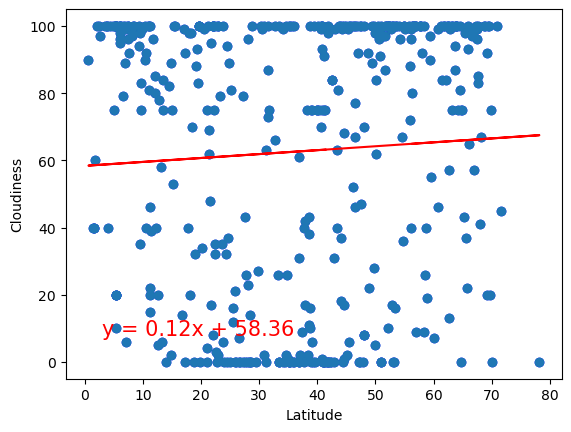

In [33]:
# Linear regression on Northern Hemisphere Temperature vs. Cloudiness
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='b')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (3, 8))

The r-squared is: 0.037180243810666216


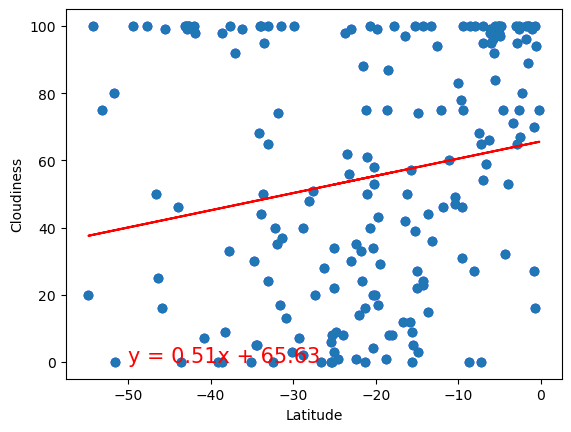

In [34]:
# Linear regression on Southern Hemisphere Temperature vs. Cloudiness
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='b')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-50, 0))

^ Discussion about the linear relationship above: The two linear regressions displayed above are moedeling the relationship between 'Latitude' and 'Cloudiness' in cities above and below the equator. Both the northern and southern hemisphere plots display an insignificant positive relationship (r value <= 0.1) between 'Latitude' and 'Cloudiness' in their corresponding cities. These regressions indicate there is no relationship between 'Latitude' and 'Cloudiness' in cities above and below the equator (northern and southern cities).

The r-squared is: 0.0052988990432667055


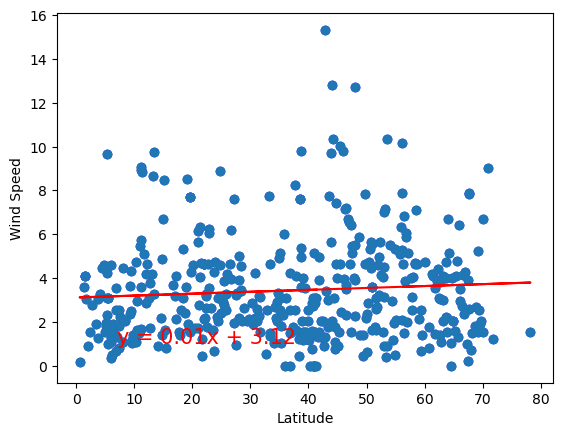

In [35]:
# Linear regression on Northern Hemisphere Temperature vs. Wind Speed
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='b')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (7, 1))

The r-squared is: 0.0791086096130334


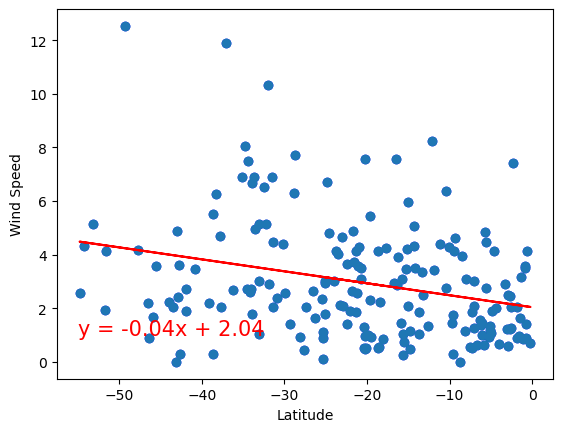

In [36]:
# Linear regression on Southern Hemisphere Temperature vs. Wind Speed
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='b')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-55, 1))

^ Discussion about the linear relationship above: The two linear regressions displayed above are moedeling the relationship between 'Latitude' and 'Wind Speed' in cities above and below the equator. The northern and southern hemisphere plots display an insignificant positive and negative relationships (r value <= 0.1) between 'Latitude' and 'Cloudiness' respectively in their corresponding cities. These regressions indicate there is no relationship between 'Latitude' and 'Cloudiness' in cities above and below the equator (northern and southern cities).